In [14]:
from ROOT import TFile, TVector3, TMath
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, fabs
import SimTools
from SimTools import axisEqual3D
import sys
import root_pandas as rp
import pandas as pd
import stripROtools
from matplotlib import cm



In [2]:
# dataframe with time offset info used for 3D reconstruction
T_off = pd.read_pickle("./data/time_offset.pk")
T_off

,Name,Mu,Mu_err,Sigma,Sigma_err
0,UH DLC a,-6.684141,0.031719,16.382493,0.024764
1,UH DLC b,-5.208232,0.034228,16.305925,0.026783
2,UH DLC c,6.752723,0.038583,14.113659,0.031446
3,UH DLC d,6.852294,0.058807,14.800689,0.048234
4,UH NoDLC a,5.703480,0.075588,19.574833,0.061573
5,UH NoDLC b,5.473110,0.114114,19.799337,0.092169
6,UH NoDLC c,25.241775,0.189180,18.082547,0.159142
7,UH NoDLC d,20.674842,0.698955,17.886667,0.626167
8,UoS,-11.400385,0.026963,15.290716,0.021079


# Load Raw Electron Recoil Simulation

In [3]:
#Select the gas
gas = 'he_co2'

# Energies to calculate
Energy = 50


# Path to degrad dataframe
file_path = './data/'+gas+'_'+str(Energy)+'keV_' + str(0) + '.root'

tracks = rp.read_root(file_path)
tracks["track"]=tracks.apply(lambda row: np.array([row.x,row.y,row.z]).T ,axis=1)
tracks


/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  warn_missing_tree)
/Users/majdghrear/anaconda3/envs/my_root_env/lib/python3.7/site-packages/root_numpy/_tree.py:241: DeprecationWarning: `np.object` is a deprecated alias 

,event_number,npoints,x,y,z,t,q,track
0,0,1421,"[-1.5426118, -0.0019720069, -0.00061417016, -0...","[0.19716597, 0.00056022295, -0.00045838192, 0....","[2.1356885, 0.0156014655, 0.02021377, 0.024035...","[780.9511, 247.36115, 62.035988, 2.1953566, 14...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.5426118, 0.19716597, 2.1356885], [-0.0019..."
1,1,1455,"[-2.2493606, 0.00011934366, 0.0045819758, 0.00...","[-1.6356924, -0.00047184023, -0.0052855257, -0...","[4.7116556, 0.029556258, 0.091615014, 0.103652...","[843.35974, 67.09398, 17.643663, 85.14483, 30....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-2.2493606, -1.6356924, 4.7116556], [0.00011..."
2,2,1417,"[-3.0727463, -8.6530745e-05, 0.006956547, 0.00...","[-1.4782587, -0.00017703052, 0.004311881, 0.00...","[3.2298143, 0.008928755, 0.09060056, 0.1070562...","[829.7765, 3.4645236, 32.024452, 159.96375, 44...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-3.0727463, -1.4782587, 3.2298143], [-8.6530..."
3,3,1409,"[1.9531488, -0.00035086353, -0.00039033583, 0....","[1.9645698, -0.0013821152, -0.00064948405, 0.0...","[2.754148, 0.0059577124, 0.018729202, 0.043582...","[832.79114, 166.77058, 87.108925, 19.63413, 6....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.9531488, 1.9645698, 2.754148], [-0.0003508..."
4,4,1438,"[-1.7506346, -0.001381954, -0.0065577794, -0.0...","[3.8638282, -0.0019665416, -0.003933189, -0.00...","[2.0456755, 0.049821302, 0.07718001, 0.1191425...","[921.5477, 10.16217, 7.0324683, 22.90555, 51.3...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.7506346, 3.8638282, 2.0456755], [-0.00138..."
...,...,...,...,...,...,...,...,...
995,995,1427,"[1.4911109, -7.3458126e-05, -0.0038581502, -0....","[-2.0394764, -0.00039780594, -0.0003104098, 0....","[1.5674381, 0.0015651374, 0.08008197, 0.106414...","[601.08435, 10.93147, 8.297052, 9.235559, 81.8...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.4911109, -2.0394764, 1.5674381], [-7.34581..."
996,996,1385,"[-1.2646766, 6.371934e-05, -0.000648575, 0.000...","[3.4374385, -3.2332716e-06, 9.291006e-05, 2.47...","[4.2949204, 2.7975237e-05, 0.011571736, 0.0306...","[893.02094, 0.280846, 66.32839, 78.45534, 238....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.2646766, 3.4374385, 4.2949204], [6.371934..."
997,997,1398,"[0.5670286, -0.0006464997, -0.00031673856, -0....","[-2.3305624, 0.0012941076, 0.0019087581, 0.002...","[1.338435, 0.026856074, 0.03743082, 0.03985472...","[825.35547, 37.436707, 3.2347796, 4.548543, 21...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[0.5670286, -2.3305624, 1.338435], [-0.000646..."
998,998,1401,"[2.9543521, -0.0018224037, 0.0009018932, 0.001...","[0.119125, -0.0018772648, -0.00075167464, 0.00...","[-0.72000974, 0.003181913, 0.00992952, 0.02574...","[869.54224, 65.81126, 81.67502, 3.1873236, 186...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[2.9543521, 0.119125, -0.72000974], [-0.00182..."


# Plot example of a track

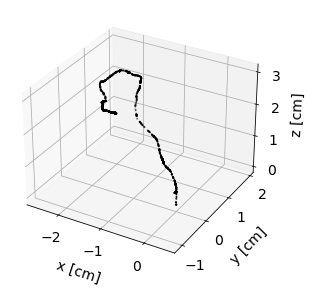

In [4]:
track = tracks.iloc[0].track

x = track.T[0]
y = track.T[1]
z = track.T[2]




fig = plt.figure()
ax = plt.axes(projection='3d')





ax.scatter3D(x, y, z, c='k', marker='o',s=1)

ax.set_xlabel('x [cm]',fontsize=14)
ax.set_ylabel('y [cm]',fontsize=14)
ax.set_zlabel('z [cm]',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=5

axisEqual3D(ax)
fig.set_tight_layout(True)



# Add diffusion to raw tracks

In [5]:
# The paramters, in order, are:
# tracks, a dataframe with the raw track info
# Transverse diffusion coefficent for 70% He 30% CO2 from Magboltz [cm/sqrt(cm)]
# Longitudinal diffusion coefficent for 70% He 30% CO2 from Magboltz [cm/sqrt(cm)]

def add_diff(tracks, DTrans = 0.0135, DLong = 0.0129):

    tracks["diff_track"] = tracks.apply(lambda row: row.track + np.array([DTrans*np.sqrt(np.abs(row.track.T[2]))*np.random.normal(size=len(row.track)),DTrans*np.sqrt(np.abs(row.track.T[2]))*np.random.normal(size=len(row.track)),DLong*np.sqrt(np.abs(row.track.T[2]))*np.random.normal(size=len(row.track))]).T ,axis=1)
    return tracks 

    

In [6]:
tracks = add_diff(tracks, DTrans = 0.0135, DLong = 0.0129)

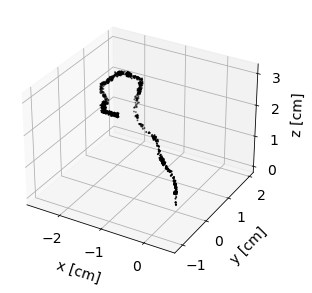

In [7]:
track = tracks.iloc[0].diff_track

x = track.T[0]
y = track.T[1]
z = track.T[2]




fig = plt.figure()
ax = plt.axes(projection='3d')





ax.scatter3D(x, y, z, c='k', marker='o',s=1)

ax.set_xlabel('x [cm]',fontsize=14)
ax.set_ylabel('y [cm]',fontsize=14)
ax.set_zlabel('z [cm]',fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)

ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=5

axisEqual3D(ax)
fig.set_tight_layout(True)



# Simulate readout


Simulates a 10 cm x 10 cm readout plane in the xy-plane centered at the origin

In [8]:
# the parameters, in order, are:
# peaking time [ns]
# digitization time [ns] 
# pitch of the x strips [um]
# pitch of the y strips [um]
# Threshold of x strips [No. electrons]
# Threshold of y strips [No. electrons]
# Charge sharing [lower strips / upper strips]
# Gain - extrapolating from PHA curve
# drift speed cm/ns
# Include charge integration effect.
# z resolution in cm, must be specified if Charge_integration = False
# Electronic gain in x [mV/fC]
# Electronic gain in y [mV/fC]

def sim_readout(tracks, peaking_time = 200, digit_t  = 250, pitch_x = 200, pitch_y = 200,thres_x = 82/9.0*6241.5, thres_y =  82/4.5*6241.5, CS = 0.62, Gain = 60000, v_drift = 0.0008, Charge_integration = True, DL = 1.2, pitch_z = 0.02, G_x = 9.0, G_y = 4.5):

    #convert pitch to cm
    pitch_x = pitch_x * 1e-4
    pitch_y = pitch_y * 1e-4
    
    # Readout is 10 cm x 10 cm
    x_bins = np.arange(-5,5,pitch_x)
    y_bins = np.arange(-5,5,pitch_y)

    # Find strip edges in x and y
    Left_edges_x = x_bins[0:-1]
    Right_edges_x = x_bins[1:]
    Left_edges_y = y_bins[0:-1]
    Right_edges_y = y_bins[1:]


    hits = pd.DataFrame(columns = ['strips_x', 'strips_y', 'times_x', 'times_y','electrons_x','electrons_y'])

    for index, row in tracks.iterrows():

        track = row.diff_track
        #Keep only point above the xy-plane (points below it do not get amplified)
        track = track[track[:,2]>0]

        x_positions = []
        x_charges = []
        x_times = []
        adcs0 = []
        strips0 = []

        for L_edge,R_edge in zip(Left_edges_x,Right_edges_x):

            # Bin track over specific strip in x
            T_track = track[(track[:,0]> L_edge) &  (track[:,0]< R_edge)] 

            # If there is charge above this strip
            if len(T_track > 0):

                # Get time distribution of charge over this strip
                time_dist = T_track[:,2]/v_drift

                # Create all hits for this strip taking into account the peaking time and the digitization time 
                while len(time_dist) > 0:

                    # Shift so that min is t = 0ns
                    min_time = np.min(time_dist)
                    time_dist= time_dist-min_time

                    # This hit will only contain charge arriving within the peaking time
                    time_dist_hit = time_dist [time_dist < peaking_time]

                    # compute mean time for this hit
                    mean_time = np.mean(time_dist_hit)+min_time

                    # obtain detected charge for this hit taking into account primary ionization, gain, and charge sharing
                    # This is a simple prelminary tratement for the gain that should be improved in the future 
                    charge_detected = len(time_dist_hit) *Gain * CS / (CS+1.0)

                    # only store infor for the hit if the charge detected exceeds the threshold
                    if charge_detected > thres_x:
                            
                        # obtain mean time for the hit
                        x_times += [mean_time]
                        # obtain position of the hit
                        x_positions += [ (L_edge+R_edge)/2.0 ]
                        # Position expressed consistently with exp digitized data
                        strips0 += [np.where(x_bins == L_edge)[0][0]]
                        # obtain detected charge taking into account primary ionization, gain, and charge sharing
                        x_charges += [ charge_detected ]
                        # Charge expressed consistently with exp digitized data
                        adcs0 += [min( charge_detected/6241.5*G_x, 1023.0 ) ]

                    # The time distribution is updated to take into account the digitization time
                    time_dist = time_dist[ time_dist > (peaking_time+digit_t) ] + min_time

        

        y_positions = []
        y_charges = []
        y_times = []
        adcs1 = []
        strips1 = []

        for L_edge,R_edge in zip(Left_edges_y,Right_edges_y):

            # Bin track over specific strip in x
            T_track = track[(track[:,1]> L_edge) &  (track[:,1]< R_edge)]

            # If there is charge above this strip
            if len(T_track > 0):

                # Get time distribution of charge over this strip
                time_dist = T_track[:,2]/v_drift

                # Create all hits for this strip taking into account the peaking time and the digitization time 
                while len(time_dist) > 0:

                    # Shift so that min is t = 0ns
                    min_time = np.min(time_dist)
                    time_dist= time_dist-min_time

                    # This hit will only contain charge arriving within the peaking time
                    time_dist_hit = time_dist [time_dist < peaking_time]

                    # compute mean time for this hit
                    mean_time = np.mean(time_dist_hit)+min_time

                    # obtain detected charge for this hit taking into account primary ionization, gain, and charge sharing
                    # This is a simple prelminary tratement for the gain that should be improved in the future 
                    charge_detected = len(time_dist_hit) * Gain / (CS+1.0)

                    if charge_detected > thres_y:

                        # obtain mean time for the hit
                        y_times += [mean_time]
                        # obtain position of the hit
                        y_positions += [ (L_edge+R_edge)/2.0 ]
                        # Position expressed consistently with exp digitized data
                        strips1 += [np.where(y_bins == L_edge)[0][0]]
                        # obtain detected charge taking into account primary ionization, gain, and charge sharing
                        y_charges += [ charge_detected ]
                        # Charge expressed consistently with exp digitized data
                        adcs1 += [ min( charge_detected/6241.5*G_y, 1023.0 ) ] # The min imposes saturation of ADC scale

                    # The time distribution is updated to take into account the digitization time
                    time_dist = time_dist[ time_dist > (peaking_time+digit_t) ] + min_time



        hits = hits.append({'strips_x' : np.array(x_positions), 'strips0' : np.array(strips0),  'strips_y' : np.array(y_positions), 'strips1' : np.array(strips1), 'times_x' : np.array(x_times), 'times0' : np.array(x_times), 'times_y' : np.array(y_times), 'times1' : np.array(y_times), 'electrons_x' :  np.array(x_charges), 'adcs0' :  np.array(adcs0), 'electrons_y' : np.array(y_charges), 'adcs1' :  np.array(adcs1) }, ignore_index = True)
        
    return hits


In [9]:
# Example of readout simulation
hits = sim_readout(tracks)
tracks = pd.concat([tracks,hits],axis=1)
tracks.head()

,event_number,npoints,x,y,z,t,q,track,diff_track,strips_x,...,times_x,times_y,electrons_x,electrons_y,adcs0,adcs1,strips0,strips1,times0,times1
0,0,1421,"[-1.5426118, -0.0019720069, -0.00061417016, -0...","[0.19716597, 0.00056022295, -0.00045838192, 0....","[2.1356885, 0.0156014655, 0.02021377, 0.024035...","[780.9511, 247.36115, 62.035988, 2.1953566, 14...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-1.5426118, 0.19716597, 2.1356885], [-0.0019...","[[-1.552387922503382, 0.17923668179369165, 2.1...","[-2.090000000000062, -2.0700000000000625, -2.0...",...,"[3093.7148754719956, 3152.8990695170287, 3000....","[2880.465917598599, 51.91063334898479, 2876.19...","[160740.74074074073, 229629.6296296296, 183703...","[185185.18518518517, 185185.18518518517, 29629...","[231.78189003711714, 331.11698576731015, 264.8...","[133.51491361585087, 133.51491361585087, 213.6...","[145, 146, 147, 147, 148, 148, 149, 149, 150, ...","[249, 250, 250, 251, 252, 252, 253, 253, 254, ...","[3093.7148754719956, 3152.8990695170287, 3000....","[2880.465917598599, 51.91063334898479, 2876.19..."
1,1,1455,"[-2.2493606, 0.00011934366, 0.0045819758, 0.00...","[-1.6356924, -0.00047184023, -0.0052855257, -0...","[4.7116556, 0.029556258, 0.091615014, 0.103652...","[843.35974, 67.09398, 17.643663, 85.14483, 30....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-2.2493606, -1.6356924, 4.7116556], [0.00011...","[[-2.246762768595161, -1.6557422328235571, 4.7...","[-2.3100000000000573, -2.2900000000000578, -2....",...,"[5903.519400760905, 5917.9319759256405, 5930.0...","[5877.548535858941, 5891.275712520094, 5929.18...","[229629.6296296296, 528148.1481481481, 803703....","[185185.18518518517, 407407.40740740736, 11111...","[331.11698576731015, 761.5690672648134, 1023.0...","[133.51491361585087, 293.732809954872, 801.089...","[134, 135, 136, 137, 138, 139, 140, 141, 142, ...","[165, 166, 167, 168, 169, 170, 171, 172, 173, ...","[5903.519400760905, 5917.9319759256405, 5930.0...","[5877.548535858941, 5891.275712520094, 5929.18..."
2,2,1417,"[-3.0727463, -8.6530745e-05, 0.006956547, 0.00...","[-1.4782587, -0.00017703052, 0.004311881, 0.00...","[3.2298143, 0.008928755, 0.09060056, 0.1070562...","[829.7765, 3.4645236, 32.024452, 159.96375, 44...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[-3.0727463, -1.4782587, 3.2298143], [-8.6530...","[[-3.0828275201707105, -1.4820484918715267, 3....","[-3.1100000000000403, -3.0900000000000407, -3....",...,"[4061.9612353610537, 4053.85039179668, 4069.11...","[4050.1985395852203, 4062.9436437280674, 4061....","[252592.59259259258, 711851.8518518518, 117111...","[592592.5925925926, 1296296.2962962962, 192592...","[364.2286843440412, 1023.0, 1023.0, 1023.0, 62...","[427.2477235707228, 934.6043953109562, 1023.0,...","[94, 95, 96, 97, 98, 99, 99, 100, 101, 101, 10...","[174, 175, 176, 177, 178, 178, 179, 179, 180, ...","[4061.9612353610537, 4053.85039179668, 4069.11...","[4050.1985395852203, 4062.9436437280674, 4061...."
3,3,1409,"[1.9531488, -0.00035086353, -0.00039033583, 0....","[1.9645698, -0.0013821152, -0.00064948405, 0.0...","[2.754148, 0.0059577124, 0.018729202, 0.043582...","[832.79114, 166.77058, 87.108925, 19.63413, 6....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[[1.9531488, 1.9645698, 2.754148], [-0.0003508...","[[1.956977681550256, 1.9853010282529326, 2.770...","[-0.33000000000009955, -0.3100000000001, -0.29...",...,"[1699.3952407677768, 1662.035735482289, 1620.8...","[50.61822436936721, 77.14680698132709, 517.146...","[229629.6296296296, 620000.0, 459259.259259259...","[185185.18518518517, 296296.2962962963, 296296...","[331.11698576731015, 894.0158615717376, 662.23...","[133.51491361585087, 213.6238617853614, 213.62...","[233, 234, 235, 236, 238, 239, 240, 241, 242, ...","[249, 250, 251, 252, 253, 254, 255, 256, 257, ...","[1699.3952407677768, 1662.035735482289, 1620.8...","[50.61822436936721, 77.14680698132709, 517.146..."
4,4,1438,"[-1.7506346, -0.001381954, -0.0065577794, -0.0..."

# Perform 3D Reconstruction

[3041.80424212 3100.98843617 2948.54754761 3385.51679463 2915.30751496
 3381.09584628 2886.09392787 3381.91025482 2820.55370959 3407.19078393
 2773.83452468 3467.9841717  2732.15958994 3474.16899656 2758.00897928
 3505.81657499 2802.24776092 3577.0966532  2826.94302766 3554.35869055
 2848.14681382 3595.20532063 2854.26048554 3635.16037225 2876.16060116
 3684.96161123 2880.16613704 3684.11934024 2878.42034996 3674.40559823
 2862.47425063 3692.53951439 2830.8440271  3665.87837038 2807.6510467
 3696.39853755 2765.64042464 2730.18587285 2711.80157185 2695.28765903
 3718.06990252 2665.2247035  3706.12339488 2647.79270645 3708.53515854
 2633.23329539 3719.65820754 2626.82005461 3706.30966191 2624.9084602
 3728.28128352 2625.55258199 3717.56500278 2623.75793508 3666.52620299
 2626.05095837 3698.03876905 2571.21146323 2958.63336223 3673.46920168
 2783.90583728 3685.32184641 2546.78620593 3136.2356493  3667.41804754
 3111.92421503 3565.3217623  3190.66661433 3595.23628618 2340.12929511
 3401.98

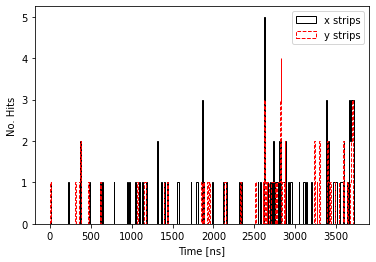

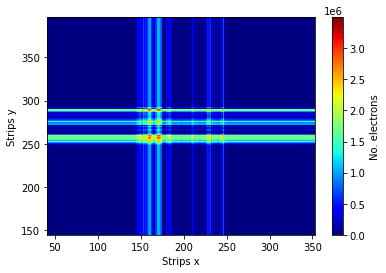

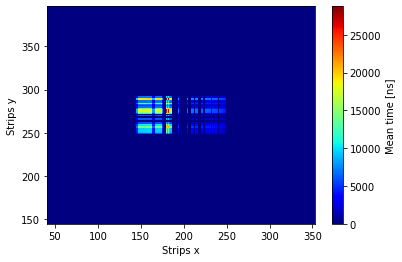

/Users/majdghrear/Desktop/xystripRO/stripROtools.py:663: RuntimeWarning: invalid value encountered in reciprocal
  abs_t_off = np.reciprocal(abs_t_off,where= abs_t_off!=0)


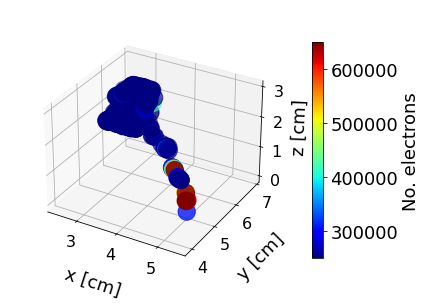

In [10]:
# 3D clustering paramters
mu = T_off.iloc[0]["Mu"]
sigma = T_off.iloc[0]["Sigma"]
n_sigma = 3

# Look at a single event after the cut
test_event = tracks.iloc[0]
# Make a TrackTools object for the event
dsp = stripROtools.TrackTools(event = test_event, Mult_factor = 1.0, gain_x=9, gain_y=4.5, v_drift=8.0)

# Plot 1D time display
dsp.TimeHistView( t_bin =10)

# Plot 2D displays of charge and time
dsp.Strip2DView(fullview = False)
dsp.Strip2DView_times(fullview = False)

# Plot 3D displays
x,y,z,c = dsp.Reconst3D_v1( mu = mu, sigma = sigma , n_sigma = n_sigma)

# Make voxel plot

In [22]:
def make_voxel_plot(x,y,z,c):

    # # Find initial t parameter to draw principal axis
    # ti = -x_b[2]/v_PA[2]

    # # Find final parameter to draw principal axis
    # tf=(np.max(z)-x_b[2])/v_PA[2]

    # # Start and stop point of fitted line
    # start = x_b + (ti*v_PA)
    # stop = x_b + (tf*v_PA)

    # # transform coord
    # xi = (start[0]-np.min(x))/200 
    # yi = (start[1]-np.min(y))/200
    # zi = (start[2]-np.min(z))/200

    # xf = (stop[0]-np.min(x))/200 
    # yf = (stop[1]-np.min(y))/200
    # zf = (stop[2]-np.min(z))/200

    x = np.round((x-np.min(x))/200).astype(int)
    y = np.round((y-np.min(y))/200).astype(int)
    z = np.round((z-np.min(z))/200).astype(int)

    # Empty array to store tensor
    tensor = np.zeros(shape=(np.max(x)+1,np.max(y)+1,np.max(z)+1))

    # Loop through track and update tensor
    for xj, yj, zj, cj in zip(x,y,z,c):

        tensor[xj][yj][zj] = cj

    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')

    ax.set_xlabel('x strip',labelpad = 40,fontsize=25)
    ax.set_ylabel('y strip',labelpad = 40,fontsize=25)
    ax.set_zlabel('z bin',labelpad = 40,fontsize=25)
    ax.tick_params(labelsize=20)
    ax.tick_params(direction='out', pad=20)
    ax.set_box_aspect(None, zoom=0.85)


    cmap = plt.get_cmap("viridis")
    norm= plt.Normalize(0.0, 700000)


    ax.voxels(tensor,facecolors=cmap(norm(tensor)),alpha=1)

    #ax.plot([xi,xf], [yi,yf], [zi,zf], color='k')

    m = cm.ScalarMappable(cmap=cmap, norm=norm)
    m.set_array([])
    cbar = plt.colorbar(m,fraction=0.03, pad=0.07)
    cbar.set_label(label='No. electrons',size=25)
    cbar.ax.tick_params(labelsize=20)

    stripROtools.set_axes_equal(ax)
    plt.tight_layout()




In [23]:
make_voxel_plot(x,y,z,c)